# Acknowledgements

 - docs.sympy.org for sympy docs for algebraic & complex numbers manipulation
 - matplotlib docs for creating multiple axes and using `set_clip_path`
 - https://matplotlib.org/stable/gallery/event_handling/looking_glass.html#sphx-glr-gallery-event-handling-looking-glass-py for learning `set_clip_path`
 - https://www.slingacademy.com/article/scipy-using-integrate-solve-ivp-function-4-examples/#:~:text=The%20solve_ivp%28%29%20function%20is%20part%20of%20the%20SciPy,interface%20for%20integrating%20a%20wide%20range%20of%20ODEs for using solve_ivp
 - chatGPT "suppose you have a system of differential equations with dependent variables x and y with independent variable t. How to use solve_ivp from scipy to generate solutions arrays of values x and y instead just one variable?"
 - chatGPT "How to create circle patches"
 - chatGPT "How to write event functions for DEs solvers"

# Introduction to the system of differential equations.

In this assigment I will be studying the Henon-Heiles system of differential equations (DEs) of a particle moving in an xy-coordinate plane with respect to time. The position of a particle affects its kinetic and potential energy.
The system of DEs is as follows: $$\ddot{x}=-x+x^2-y^2$$ $$\ddot{y}=-y-2xy$$ where x and y are dependent variables on time $t$. The relationship between kinetic energy and potential energy is as follows. $$E=V+T$$ where $E$ is total energy, $V$ is potential energy and $T$ is kinetic energy. $V$ and $T$ are defined by $\\[10pt]$ $$V = \frac{1}{2}x^{2}+\frac{1}{2}y^{2}+xy^{2}-\frac{1}{3}x^{3} \\[10pt]$$
$$T = \frac{1}{2}\dot{x}^{2}+\frac{1}{2}\dot{y}^{2}\\[10pt]$$


I am going to show that the total energy E in a Henon-Heiles system is conserved (i.e. $\dot{E}=0$).
If we differentiate both sides to the energy equations with respect to $t$ we get $\dot{E}=\dot{V}+\dot{T}$. So what I need to do is find $\dot{V}$ and $\dot{T}$ and show that their sum is 0.
To do this, I am going to use sympy's algebraic manipulation ecosystem. I am going to import everything I need here.
On line 2, frac is used to treat precise floating point numbers as fractions.


In [1]:
import sympy
from sympy import Rational as frac
from sympy import Function, symbols, Equality, integrate
sympy.init_printing()

x and y are my dependent variables whereas t is my independent variable. I will create the respective objects.

In [2]:
t = symbols('t')
x = Function('x')(t) # dependent on t
y = Function('y')(t)

In the next 2 cells, I will write out the expressions for $V$ and $T$.

In [3]:
V = frac(1,2)*x**2 + frac(1,2)*y**2 + x*y**2 - frac(1,3)*x**3
V

   3       2                    2   
  x (t)   x (t)         2      y (t)
- ───── + ───── + x(t)⋅y (t) + ─────
    3       2                    2  

In the following expression, since we have **not** defined what $y$ and $x$ are in terms of $t$, sympy just treats the functions generally and hence writes $\frac{dx}{dt}$ instead of the actual expression of $\dot{x}$ (which we don't know).

In [4]:
T = frac(1,2)*x.diff(t)**2 + frac(1,2)*y.diff(t)**2
T

          2             2
⎛d       ⎞    ⎛d       ⎞ 
⎜──(x(t))⎟    ⎜──(y(t))⎟ 
⎝dt      ⎠    ⎝dt      ⎠ 
─────────── + ───────────
     2             2     

Next, I will use sympy to compute the derivatives of T and V with respect to time. This will involve major use of the chain rule. Since y and x are unknown functions, sympy will leave the derivative of $x$ in terms of $\frac{dx}{dt}$ and the derivative of $\dot{x}$ in terms of $\frac{d^2x}{dt^2}$ and so on. Here, single underline is refered to as the 1st derivative.

In [5]:
V_ = V.diff(t)
V_

   2    d                      d               d           2    d             
- x (t)⋅──(x(t)) + 2⋅x(t)⋅y(t)⋅──(y(t)) + x(t)⋅──(x(t)) + y (t)⋅──(x(t)) + y(t
        dt                     dt              dt               dt            

  d       
)⋅──(y(t))
  dt      

Since $\dot{V}$ does not have any second-order derivative ($\frac{d^2x}{dt^2}$) terms, I will have to use the given literal expressions of $\ddot{x}$ and $\ddot{y}$ in the brief. Otherwise, sympy won't be able to expand and simplify the expression when I add $\dot{V}$ and $\dot{T}$.

In [6]:
# Equivalent to T_ = T.diff(t)
T_ = x.diff(t)*(-x+x**2-y**2) + y.diff(t)*(-y-2*x*y)
T_

                      d          ⎛ 2              2   ⎞ d       
(-2⋅x(t)⋅y(t) - y(t))⋅──(y(t)) + ⎝x (t) - x(t) - y (t)⎠⋅──(x(t))
                      dt                                dt      

The following shows the fully expanded expression and when everything cancels out. Leading to the conclusion the energy is conserved since that change in energy $\dot{E} = 0$.

In [7]:
T_ + V_

                      d          ⎛ 2              2   ⎞ d           2    d    
(-2⋅x(t)⋅y(t) - y(t))⋅──(y(t)) + ⎝x (t) - x(t) - y (t)⎠⋅──(x(t)) - x (t)⋅──(x(
                      dt                                dt               dt   

                  d               d           2    d               d       
t)) + 2⋅x(t)⋅y(t)⋅──(y(t)) + x(t)⋅──(x(t)) + y (t)⋅──(x(t)) + y(t)⋅──(y(t))
                  dt              dt               dt              dt      

In [8]:
sympy.simplify(T_ + V_)

0

## Demonstrating the relationship between the system of DEs and complex variables

I must show that if I set the complex variable $z = x + iy$ where x and y are the functions (and $i$ is the imaginary number) defined in the Henon-Heiles system with variable t, then $\ddot{z}=-z + \bar{z}^2$. Where a dot above still means "derivative with respect to t". I will complete this task by hand-algebraic manipulation.

I also must show that
$V = \frac{1}{2}|z|^2-\frac{1}{3}Re(z^3)$ and
$T = \frac{1}{2}|\dot{z}|^2$

Let's start with $z = x+ iy$. Differentiating with respect to t gives $$\dot{z}=\dot{x}+i\dot{y}$$ Differentiating again gives $$\ddot{z}=\ddot{x}+i\ddot{y}$$We will use the definitions of $̈\ddot{x}$ and ̈$\ddot{y}$ to sub in the expressions $$\ddot{z}=-x+x^2-y^2+i(-y-2yx)$$
$$\ddot{z}=-x+x^2-y^2+-yi-2iyx$$
$$\ddot{z}=-x-iy+x^2-y^2-2iyx$$
$$\ddot{z}=-(x+iy)+(x-iy)^2$$
$$\ddot{z}=-z + \bar{z}^2 \\[10pt]$$ Hence proven. Now I am going to show the relationship $T = \frac{1}{2}(\dot{x}^2+\dot{y}^2)$ holds true.

$$T = \frac{1}{2}|\dot{z}|^2$$
$$T = \frac{1}{2}|\dot{x}+i\dot{y}|^2$$
$$T = \frac{1}{2}(\dot{x}^2+\dot{y}^2) \\[10pt]$$
Hence proven for $T$ by the defintion of the modulus of a complex variable. Now I will show the expression $V = \frac{1}{2}|z|^2-\frac{1}{3}Re(z^3)$ is true.

$$V = \frac{1}{2}|z|^2-\frac{1}{3}Re(z^3)$$
$$V = \frac{1}{2}|x+iy|^2-\frac{1}{3}Re((x+iy)^3)$$
$$V = \frac{1}{2}(x^2+y^2)-\frac{1}{3}(x^3-y^2x-2xy^2)$$
$$V = \frac{1}{2}x^2+\frac{1}{2}y^2+xy^2-\frac{1}{3}x^3$$
Hence proven for V

## Find stationary points for all $t$

Now, I am going to find the stationary points to the system of differential equations. In other words, which coordinates $x$ and $y$, the system stays at those coordinates for all time $t$.
Since $\dot{x} = 0$ and  $\dot{y} = 0$ for all $t$, then $\ddot{x} = 0$ and  $\ddot{y} = 0$ too for all $t$ too.

$$\dot{p}=-x+x^2-y^2=0$$ $$\dot{q} = -y-2xy=0$$ where $p=\dot{x}$ and $q=\dot{y}$


I am going to use sympy.solve to solve the system of equations for x and y and return them as a list of stationary coordinate pairs

In [9]:
import sympy
x, y = sympy.symbols('x y')
stationary_pts = sympy.solve([-y-2*x*y, -x+x**2-y**2], [x,y], dict=False)
stationary_pts

⎡⎛      -√3 ⎞  ⎛      √3⎞                ⎤
⎢⎜-1/2, ────⎟, ⎜-1/2, ──⎟, (0, 0), (1, 0)⎥
⎣⎝       2  ⎠  ⎝      2 ⎠                ⎦

The solver found 4 stationary points $(0,0)$, $(1,0)$, $(-\frac{1}{2},\frac{-\sqrt{3}}{2})$ and $(-\frac{1}{2},\frac{\sqrt{3}}{2})$

## Exploring potential energy $V$

I will show that $$V-\frac{1}{6}=(x+\frac{1}{2})(y-\frac{x-1}{\sqrt{3}})(y+\frac{x-1}{\sqrt{3}})$$ and this describes the set of points where $V=\frac{1}{6}$.
To do this task, I will check of expressions A and B are equal by having sympy check that A - B = 0.

In [10]:
import sympy
from sympy import Rational as frac
from sympy import sqrt
x, y = sympy.symbols('x y')
A = frac(1,2)*x**2 + frac(1,2)*y**2 + x*y**2 - frac(1,3)*x**3
B = (x+frac(1,2))*(y-(x-1)/sqrt(3))*(y+(x-1)/sqrt(3)) + frac(1,6)

In [11]:
A

   3    2           2
  x    x       2   y 
- ── + ── + x⋅y  + ──
  3    2           2 

In [12]:
B

          ⎛    √3⋅(x - 1)⎞ ⎛    √3⋅(x - 1)⎞   1
(x + 1/2)⋅⎜y - ──────────⎟⋅⎜y + ──────────⎟ + ─
          ⎝        3     ⎠ ⎝        3     ⎠   6

In [13]:
sympy.simplify(A-B)

0

To find the set of points where $V=\frac{1}{6}$, I going to set the expression equal to $V-\frac{1}{6}$ and use the sympy solve to solve for x and y.

In [14]:
set_of_pts = sympy.solve([B-frac(1,6)], [x,y], dict=False)
set_of_pts

[(-1/2, y), (-√3⋅y + 1, y), (√3⋅y + 1, y)]

Hence, the set of points are $(-\frac{1}{2}, y)$, $(-y\sqrt{3} + 1, y)$, $(y\sqrt
{3} + 1, y)$ where $y$ is the free playing variable.

Keeping this procedure in mind, I am going to show that all the points where $V=0$ are in the form $$(x,y)=\frac{3+s^2}{2\sqrt{3}(1-s^2)}(\sqrt{3}, s)$$ where the I will refer to the fraction outside the parentheses as my `scalar` in the code.

In [15]:
from sympy import sqrt
x, y, s = sympy.symbols('x y s')
scalar = (3+s**2)/(2*sqrt(3)*(1-s**2))
scalar

   ⎛ 2    ⎞
√3⋅⎝s  + 3⎠
───────────
   ⎛     2⎞
 6⋅⎝1 - s ⎠

Now, I will set x and y in terms of s

In [16]:
x = scalar * sqrt(3)
y = scalar * s

Plugging x and y in terms of s into the expression $$V=(x+\frac{1}{2})(y-\frac{x-1}{\sqrt{3}})(y+\frac{x-1}{\sqrt{3}})+\frac{1}{6}=0$$ and simplifying using sympy gives 0 so the statement of the form of all the points where $V = 0$ is true.

In [17]:
sympy.simplify((x+frac(1,2))*(y-(x-1)/sqrt(3))*(y+(x-1)/sqrt(3)) + frac(1,6))

0

# Vizualising the system of differential equations

## Drawing the potential energy $V$ Contours

I am going to plot how the $x$ and $y$ values vary over time with different values of $V=c$ where $c$ is a real constant. I am going to show the contours with the following key. Red line: $c > \frac{1}{6}$. Blue line: $0 \leq c \leq \frac{1}{6}$. Green line: $c < 0$


In [18]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from sympy import Rational as frac
from sympy import sqrt
from sympy.testing.pytest import ignore_warnings
from matplotlib.patches import Circle

The `V_map` function will be used to take the solved sympy expression  for $V=c$ and maps the array of x values to the y-values. The `set_line_color` function set the color of the line in the chart based on which values of $c$ is being plotted.

In [19]:
def V_map(func, x_linspace):
  """
  Maps x values to y-values and handles errors the sympy raises or
  un-matches array lengths

  Params:
    (function) func - a *lambdified* sympy function
    (arr) x_linspace - the x domain to be mapped to y codomain

  Returns:
    arr - the y codomain
  """
  with ignore_warnings(RuntimeWarning):
    y_coords = np.zeros(len(x_linspace))
    for i in range(len(x_linspace)):
      try:
        y_coords[i] = func(x_linspace[i])
      except ValueError:
        y_coords[i] = None
      except TypeError:
        y_coords[i] = None

    return y_coords

def set_line_color(c):
  """
  Outputs which colour the contour lines should be based on the value of
  the constant c.

  Params:
    (float) c - the constant to V = c

  Returns:
    (string) colour of hex number to set the colour of the contour line
  """
  if c < 0: return 'green'
  if 0 <= c < 1/6: return '#34ebe5' #lightblue
  if c == 1/6: return '#0755db' #darkblue
  if c > 1/6: return 'red'

The next 2 variables will be global variables. They will stored the array of $(x, y)$ points so that when I plot the same graph again, I won't asked sympy to re-calculate the solutions as I will have it stored.

In [20]:
initial_plot_x_vals_list = []
initial_plot_y_vals_list = []

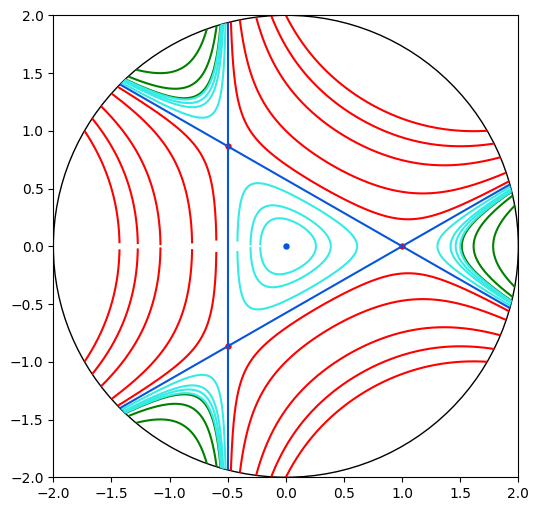

In [21]:
def draw_contours(R=2, n=500):
  """
  Draws a contour chart with  default radius 2 on a default 500x500 grid.

  Params:
    R (float) - default outer radius of 2
    n (int) - the chart will be constructed by default of n x n points.

  It does not return anything, it plots AND displays the chart.
  """
  global initial_plot_x_vals_list, initial_plot_y_vals_list
  x, y = sympy.symbols('x y')
  x_base_linspace = np.linspace(-R, R, num=n)
  V_func = (x+frac(1,2))*(y-(x-1)/sqrt(3))*(y+(x-1)/sqrt(3)) + frac(1,6)

  # Different values of c
  cs_arr = [-0.01, -0.1, -0.3, 0, 1/36, 2/36, 4/36, 1/6, 9/36, 1/2, 1, 1.5, 2]

  circle = Circle(xy=(0,0), radius=R, edgecolor='black', facecolor='none') # all lines inside this circle will be shown

  fig, ax = plt.subplots(figsize=(6,6))
  ax.add_patch(circle)
  ax.set_clip_path(circle)

  for c in cs_arr:
    Y_funcs = sympy.solve(V_func - c, [y]) # 2 funcs due to square root

    y0_linspace = V_map(sympy.lambdify(x, Y_funcs[0]), x_base_linspace)
    y1_linspace = V_map(sympy.lambdify(x, Y_funcs[1]), x_base_linspace)

    ax.plot(x_base_linspace, y0_linspace, color=set_line_color(c), clip_path=circle)
    ax.plot(x_base_linspace, y1_linspace, color=set_line_color(c), clip_path=circle)

    initial_plot_x_vals_list.append(x_base_linspace)
    initial_plot_x_vals_list.append(x_base_linspace)
    initial_plot_y_vals_list.append(y0_linspace)
    initial_plot_y_vals_list.append(y1_linspace)

  ax.scatter([0], [0], s=13, color='#0755db', clip_path=circle)
  ax.plot(np.full(1000, -0.5), np.linspace(-R, R, 1000), color='#0755db', clip_path=circle)
  ax.scatter([-0.5,-0.5,1], [-sqrt(3)/2,sqrt(3)/2,0], s=13, color='red', clip_path=circle)

  ax.set_xlim(-R, R)
  ax.set_ylim(-R, R)
  plt.show()

draw_contours(n=10_000)

## Making the contour plot faster and more re-usable

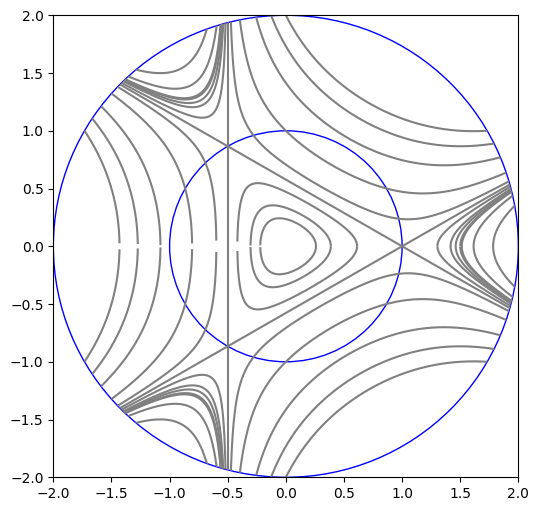

In [22]:
fig1, ax1 = plt.subplots(figsize=(6,6))

def draw_grey_contours(ax):
  """
  This function makes plotting the initial contour lines faster as it reads the
  computed (x,y) pairs from memory.
  The plot is in grey and it has the 2 circles so we can see how far the
  particular solutions will go.

  Params:
    (Axes) ax - A matplotib Axes object where changes and plots will be
                made to it.
  """
  big_circle = Circle((0,0), 2, edgecolor='blue', facecolor='none')
  small_circle = Circle((0,0), 1, edgecolor='blue', facecolor='none')

  ax.add_patch(big_circle)
  ax.add_patch(small_circle)
  ax.set_clip_path(big_circle)

  for i in range(len(initial_plot_x_vals_list)):
    ax.plot(initial_plot_x_vals_list[i],initial_plot_y_vals_list[i],color='grey',clip_path=big_circle)

  ax.plot(np.full(500, -0.5), np.linspace(-2,2,500), color='grey',clip_path=big_circle)

  ax.set_xlim(-2,2)
  ax.set_ylim(-2,2)

draw_grey_contours(ax1)

plt.show()

## Showing that the image above remains unchanged after a 1/3 turn either way.

The image is unchaged if we perform a 1/3 turn on it in either direction. To mathematically show that this is true, I will treat the xy-plane as the complex plane. We know from our previous work with complex numbers that $$V=\frac{1}{2}|z|^2-\frac{1}{3}Re(z^3)$$ Rotating by 120 degree anticlockwise means multiplying a complex expression by $cos(120^\circ)+isin(120^\circ)$. For every complex number $z$, its $120^\circ$ shift will be $w$, when both put through the formula for potential energy $V$ should produce the same answer. I will check this by generating 2 different potential energies for arbitrary complex numbers and check that their difference $V_1-V_2=0$. In this case $$V_1=\frac{1}{2}|z|^2-\frac{1}{3}Re(z^3)$$ and $$V_2=\frac{1}{2}|w|^2-\frac{1}{3}Re(w^3)$$

In [23]:
from sympy import I
from sympy import Rational as frac
from sympy import expand_complex, simplify, sin, cos, pi
from sympy import re as Re
from sympy import pi

x, y = sympy.symbols('x y', real=True)
z, w, V1, V2 = sympy.symbols('z w V1 V2', complex=True)

Now I am going to create the arbitrary complex number $z$ and its 120degrees rotated counter part $w$.

In [24]:
z = x+I*y # Arbitrary complex number z
z

x + ⅈ⋅y

In [25]:
w = expand_complex((cos(2*pi/3) + I*sin(2*pi/3))*z) # z rotated 1/3 turn around origin
w

  x   √3⋅y     ⎛√3⋅x   y⎞
- ─ - ──── + ⅈ⋅⎜──── - ─⎟
  2    2       ⎝ 2     2⎠

Now I will plug both, $z$ and $w$ through $V$ to get expressions which will be simplified later.

In [26]:
V1 = expand_complex(frac(1,2)*abs(z)**2-frac(1,3)*Re(z**3))
V1

   3    2           2
  x    x       2   y 
- ── + ── + x⋅y  + ──
  3    2           2 

In [27]:
V2 = expand_complex(frac(1,2)*abs(w)**2-frac(1,3)*Re(w**3))
V2

                      3                           
          ⎛  x   √3⋅y⎞                            
 2    2   ⎜- ─ - ────⎟                           2
x    y    ⎝  2    2  ⎠    ⎛  x   √3⋅y⎞ ⎛√3⋅x   y⎞ 
── + ── - ───────────── + ⎜- ─ - ────⎟⋅⎜──── - ─⎟ 
2    2          3         ⎝  2    2  ⎠ ⎝ 2     2⎠ 

Simplifying the expression with sympy gives 0, which meaning $V_1$ and $V_2$ are the same. This means that no matter what coordinate I pick in the plane, if I rotate the coordinate by a 1/3 turn, I will get the same potential energy. Hence, the image generate by $V=c$ is the same when rotated by 1/3 turn.

In [28]:
sympy.simplify(V1 - V2)

0

# Solving the system of differential equations numerically.

Below I will define the function which solves the system of DE's numerically. The only paramenter it will take are the inital conditions. In order to predict what kind of particular solutions will be plotted, I will need to use the Energy equations. $\\[10pt]$ $$V = \frac{1}{2}x^{2}+\frac{1}{2}y^{2}+xy^{2}-\frac{1}{3}x^{3} \\[10pt]$$
$$T = \frac{1}{2}\dot{x}^{2}+\frac{1}{2}\dot{y}^{2}\\[10pt]$$ $$E=V+T$$

In the following cell, I will programmatically set up to system of differential equations under the function `system_of_DEs`. The `escape` function will keep track of when the $(x,y)$ coordinates leave the circle with radious 2 (we will worry about that later). For now the important thing is to set up the system of DEs and put it through the numerical solver to get some solutions.

In [29]:
from math import sqrt
import numpy as np
from scipy.integrate import solve_ivp

def escape(t, u):
  """
  Params:
    t (float) - It time, it's note used in the function but it need to be
                a parameter for the solver to work well
    u (iterable) - Initial conditions

  This function makes the solver stop whenever the x,y coords exit
  the circle of radius 2.
  """
  x, y, p, q = u
  if x**2 + y**2 >= 4:
    return 1
  else:
    return -1

escape.terminal = True

def system_of_DEs(t, u):
  """
  Params:
    t (float) - time is the only independent variable, although we don't
                actually have known time values, its imporant to include
                it in the parameters of the system so that the solver can
                work well and generate solutions.
    u (iterable) - u is the list/tuple of initial conditions.

  Returns:
    List (floats) - Returns a list of computed values according to the
                    definition of the derivative.
  """
  x, y, p, q = u
  x_ = p
  y_ = q
  p_ = -x+x**2-y**2
  q_ = -y-2*x*y
  return [x_, y_, p_, q_]


Now I am going to define the `solve` function.

In [30]:
def solve(u0, t_span=(0, 10)):
  """
  Returns:
    Solution obj: if the solver successfully resolves the systems of
                  DEs, it returns an object containing attributes of the
                  solutions.
    Raises:
      Error - if a solution cannot be found for whatever reason,
              it prints out the error
  """
  t_linspace = np.linspace(t_span[0], t_span[1], 10_000)
  sol = solve_ivp(system_of_DEs, t_span, u0, t_eval=t_linspace, events=escape)
  return sol

# Example solution
sol = solve([0.4, 0.1, 0.1, 0.001])
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-03 ...  9.999e+00  1.000e+01]
        y: [[ 4.000e-01  4.001e-01 ... -2.872e-01 -2.874e-01]
            [ 1.000e-01  1.000e-01 ... -1.707e-02 -1.700e-02]
            [ 1.000e-01  9.975e-02 ... -2.074e-01 -2.071e-01]
            [ 1.000e-03  8.200e-04 ...  6.121e-02  6.122e-02]]
      sol: None
 t_events: [array([], dtype=float64)]
 y_events: [array([], dtype=float64)]
     nfev: 98
     njev: 0
      nlu: 0

# Ploting particular solutions to the system

I am going to explore 4 different type of initial conditions to see how the system unfolds.
For each situation, I will have an array of 4 different initial conditions satisfying the situation and I will generate 4 different plots on a 2x2 grid.
Initially when exploring the different set of scenarious, I found it hard to come up with initial conditions because this (and most other) systems are very sensitive to initial conditions.

In [31]:
def show_trajectory(u0, ax, t_span=(0, 10)):
  """
  This function will plot a particular solution to the DE
  based on its initial conditions

  Params:
    (iterable) u0 - initial conditions
    (Axes) ax - Maplotlib Axes object for the solution to be plotted.

    Although the specification says the I should not have parameters other than
    u0, I find it hard to create nice,compact 2x2 plot without calling the
    function 4 times and changing 4 different axes.
  """
  sol = solve(u0, t_span=t_span)
  x, y = sol.y[0], sol.y[1]
  draw_grey_contours(ax)
  ax.plot(x, y, color='red')
  u0_title = [round(e, 2) for e in u0]
  ax.set_title(f'u0 = {u0_title}', fontsize=12, fontfamily='sans-serif')


## 1. (x, y) is near center and p and q are small.
The potential and kinetic energy are both small so over time the particle stays within the inner triangle. Total energy is constant and since its small to start off with, no large volumes of potential energy V can be reached.


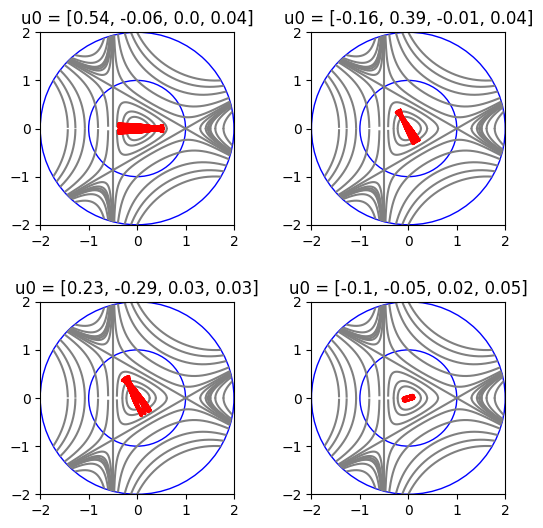

In [32]:
u_s = [
  [0.54, -0.06, 0.0, 0.04],
  [-0.16, 0.39, -0.01, 0.04],
  [0.23, -0.29, 0.03, 0.03],
  [-0.1, -0.05, 0.02, 0.05],
]

fig, axs = plt.subplots(2, 2, figsize=(6,6))
axs_indexes = [[0,0],[0,1],[1,0],[1,1]]

for k in range(len(u_s)):
  i, j = axs_indexes[k]
  show_trajectory(u_s[k], axs[i, j], t_span=(1, 100))

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

## 2. (x, y) is inside the triangle and the total energy is close to 1/6.
Since energy E is constant but V is close to 1/6,the particle will be able to gain enough kinetic energy to move all around the inner triangle but still never cross it. This is will cause the particle to move a lot through the triangle, much more than in the previous initial conditions.


In [ ]:
u_s = [
  [0.28, -0.33, -0.21, 0.23],
  [-0.46, -0.61, -0.0, 0.16],
  [-0.32, -0.14, -0.08, 0.44],
  [0.06, -0.32, -0.2, 0.42],
]

fig, axs = plt.subplots(2, 2, figsize=(6,6))
axs_indexes = [[0,0],[0,1],[1,0],[1,1]]

for k in range(len(u_s)):
  i, j = axs_indexes[k]
  show_trajectory(u_s[k], axs[i, j], t_span=(1, 50))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()

## 3. initial conditions are (x, 0, 0, q) with x fixed and letting q vary to produce a simple closed curve.
In this case I will fix $x=0$ to show that the system balances and forms a nice curve.


In [ ]:
u_s = [
    [0, 0, 0, 0.12],
    [0, 0, 0, 0.35],
    [0, 0, 0, 0.52],
    [0, 0, 0, 0.62],
]

fig, axs = plt.subplots(2, 2, figsize=(6,6))
axs_indexes = [[0,0],[0,1],[1,0],[1,1]]

for k in range(len(u_s)):
  i, j = axs_indexes[k]
  show_trajectory(u_s[k], axs[i, j], t_span=(1, 40))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()

## 4. The initial speed (and hence kinetic energy) is higher.
 The particle should escape to infinity on in either of the directions that the corners of the middle triangle are pointing.

In [ ]:
u_s = [
  [0.0, 0.01, -0.61, -0.1],
  [-0.08, -0.02, 0.18, -0.59],
  [-0.08, -0.01, 0.47, 0.44],
  [0.06, -0.06, 0.36, 0.5],
]

fig, axs = plt.subplots(2, 2, figsize=(6,6))
axs_indexes = [[0,0],[0,1],[1,0],[1,1]]

for k in range(len(u_s)):
  i, j = axs_indexes[k]
  show_trajectory(u_s[k], axs[i, j], t_span=(1, 100))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()

# Making the Escape time as large as possible

We are going to track how long it takes for the particle to escape the radius 2 and try to make the time as large as possible.

In [ ]:
def escape_time(u0):
  """
  The escape function defined before returns values in the solution attributes
  so if the particle escaped the array sol.t_events will not be empty.

  Params:
    u0 (iterable) - Initial conditions as list or tuple

  Returns:
    inf (np.inf) - if the particle never escapes the circle, then then escape time is
                   infinity
    float - The time at which the particle escapes the circle with radius 2.
  """
  sol = solve(u0)
  if len(sol.t_events[0]) == 0:
    return np.inf
  else:
    return sol.t_events[0][0]

In the next cell I am going to find the escape time of 40,000 points
and store them as a list and output the 4 largest $(x,y)$ which produce
the greatest escape time. I will split the x and y intervals into 200 steps and iterate through them.
DO NOT RUN THIS CELL, IT TAKES 4 MINUTES TO RUN, at least.

In [ ]:
# WARNING: DO NOT RUN THIS CELL (It takes 4 minutes to run)
# WARNING: DO NOT RUN THIS CELL (It takes 4 minutes to run)
# WARNING: DO NOT RUN THIS CELL (It takes 4 minutes to run)

import random
from math import sqrt, sin, cos, pi
import numpy as np

longest_times = []

def find_long_trajectory(v, y, theta):
  global longest_times
  u0 = (-0.5, y, v*cos(theta), v*sin(theta))
  escape_t = escape_time(u0)
  if escape_t != np.inf:
    longest_times.append(
        {'y': y, 'theta': theta, 't': escape_t}
    )

for y in np.linspace(-sqrt(3)/2, sqrt(3)/2, 200):
  for theta in np.linspace(0, 2*pi, 200):
    find_long_trajectory(0.5, y, theta)

# the following line sorts the object according to their largest time 't'
sorted_dicts = sorted(longest_times, key=lambda x: x['t'], reverse=True)
top4 = sorted_dicts[:4]
for dict_ in top4:
  print(dict_)

{'y': -0.17842734449830133, 'theta': 5.367545237289094, 't': 9.99968549319356}
{'y': 0.17842734449830155, 'theta': 0.9156400698904925, 't': 9.999685493193484}
{'y': 0.6571348541278907, 'theta': 4.104593416750483, 't': 9.998525204699504}
{'y': -0.6571348541278905, 'theta': 2.178591890429103, 't': 9.998525204693998}


Assuming the cell has ran, here are the top 4 times, and which respective values of $y$ and $\theta$ generated them. I will plot them to show what these solutions look like.

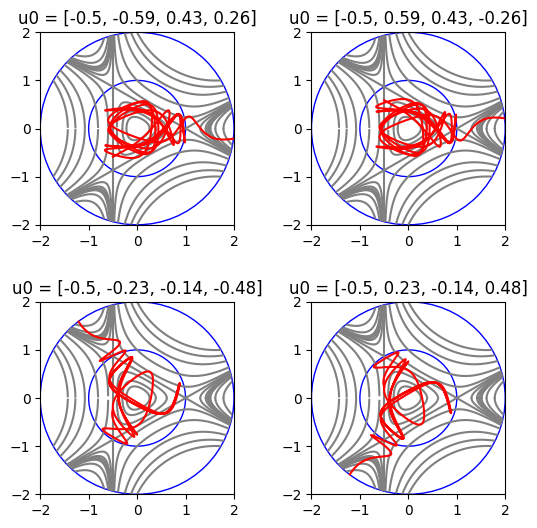

In [ ]:
top4 =  [
  {'y': -0.5875046709090412, 'theta': 0.5367545237289094, 't': 56.676521034793154},
  {'y': 0.5875046709090415, 'theta': 5.746430783450677, 't': 56.67495956259697},
  {'y': -0.23064998191243835, 'theta': 4.420331371885136, 't': 50.827290626839826},
  {'y': 0.23064998191243857, 'theta': 1.8628539352944502, 't': 50.82669176374368},
]

u_s = []

for dict_ in top4:
  p, q = 0.5*cos(dict_['theta']), 0.5*sin(dict_['theta'])
  u_s.append([-0.5, dict_['y'], p, q])

fig, axs = plt.subplots(2, 2, figsize=(6,6))
axs_indexes = [[0,0],[0,1],[1,0],[1,1]]

for k in range(len(u_s)):
  i, j = axs_indexes[k]
  show_trajectory(u_s[k], axs[i, j], t_span=(1, 100))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()